# **GMM Based Clustering On Student dataset**
(27901, 18)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [96]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,PowerTransformer, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

import seaborn as sns

In [97]:
# Function to load datasets
def load_data(dataset_name):
    if dataset_name == 'students':
        data = pd.read_csv('/content/drive/MyDrive/ML2 Project/Student-Dataset.csv')
    elif dataset_name == 'shoppers':
        data = pd.read_csv('/content/drive/MyDrive/ML2 Project/Online Shoppers Purchasing.csv')
    else:
        raise ValueError("Dataset not recognized")
    return data

In [98]:
data = load_data('students')
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


# Data Exploration

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [100]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [101]:
data.shape

(27901, 18)

## Checking Missing Values

In [102]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


## Here dropping unncessary columns

In [103]:
data.drop(['id', 'Work Pressure', 'Profession','Job Satisfaction'], axis=1, inplace=True)

In [104]:
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [105]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Academic Pressure                      27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Sleep Duration                         27901 non-null  object 
 7   Dietary Habits                         27901 non-null  object 
 8   Degree                                 27901 non-null  object 
 9   Have you ever had suicidal thoughts ?  27901 non-null  object 
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,7.656104,2.943837,7.156984,3.139867,0.585499
std,4.905687,1.381465,1.470707,1.361148,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [107]:
mydata = data.copy()
data.columns


Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [110]:
# Calculatiing columns types and printing them separately
bool_columns = data.select_dtypes(include=['bool']).columns
num_columns = data.select_dtypes(include=['float64', 'int64']).columns
cat_columns = data.select_dtypes(include=['object']).columns

print("Boolean columns:", bool_columns.tolist())
print("Numerical columns:", num_columns.tolist())
print("Categorical columns:", cat_columns.tolist())

Boolean columns: []
Numerical columns: ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
Categorical columns: ['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


## **Check Outliers**

In [111]:
def remove_outliers(df, numerical_columns):
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

numerical_columns = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

data = remove_outliers(data, numerical_columns)

# **Data Visulaization**


1.   Piecharts for each numerical column
2.   Hostogram
3.   Coorelation Heatmap Analysis



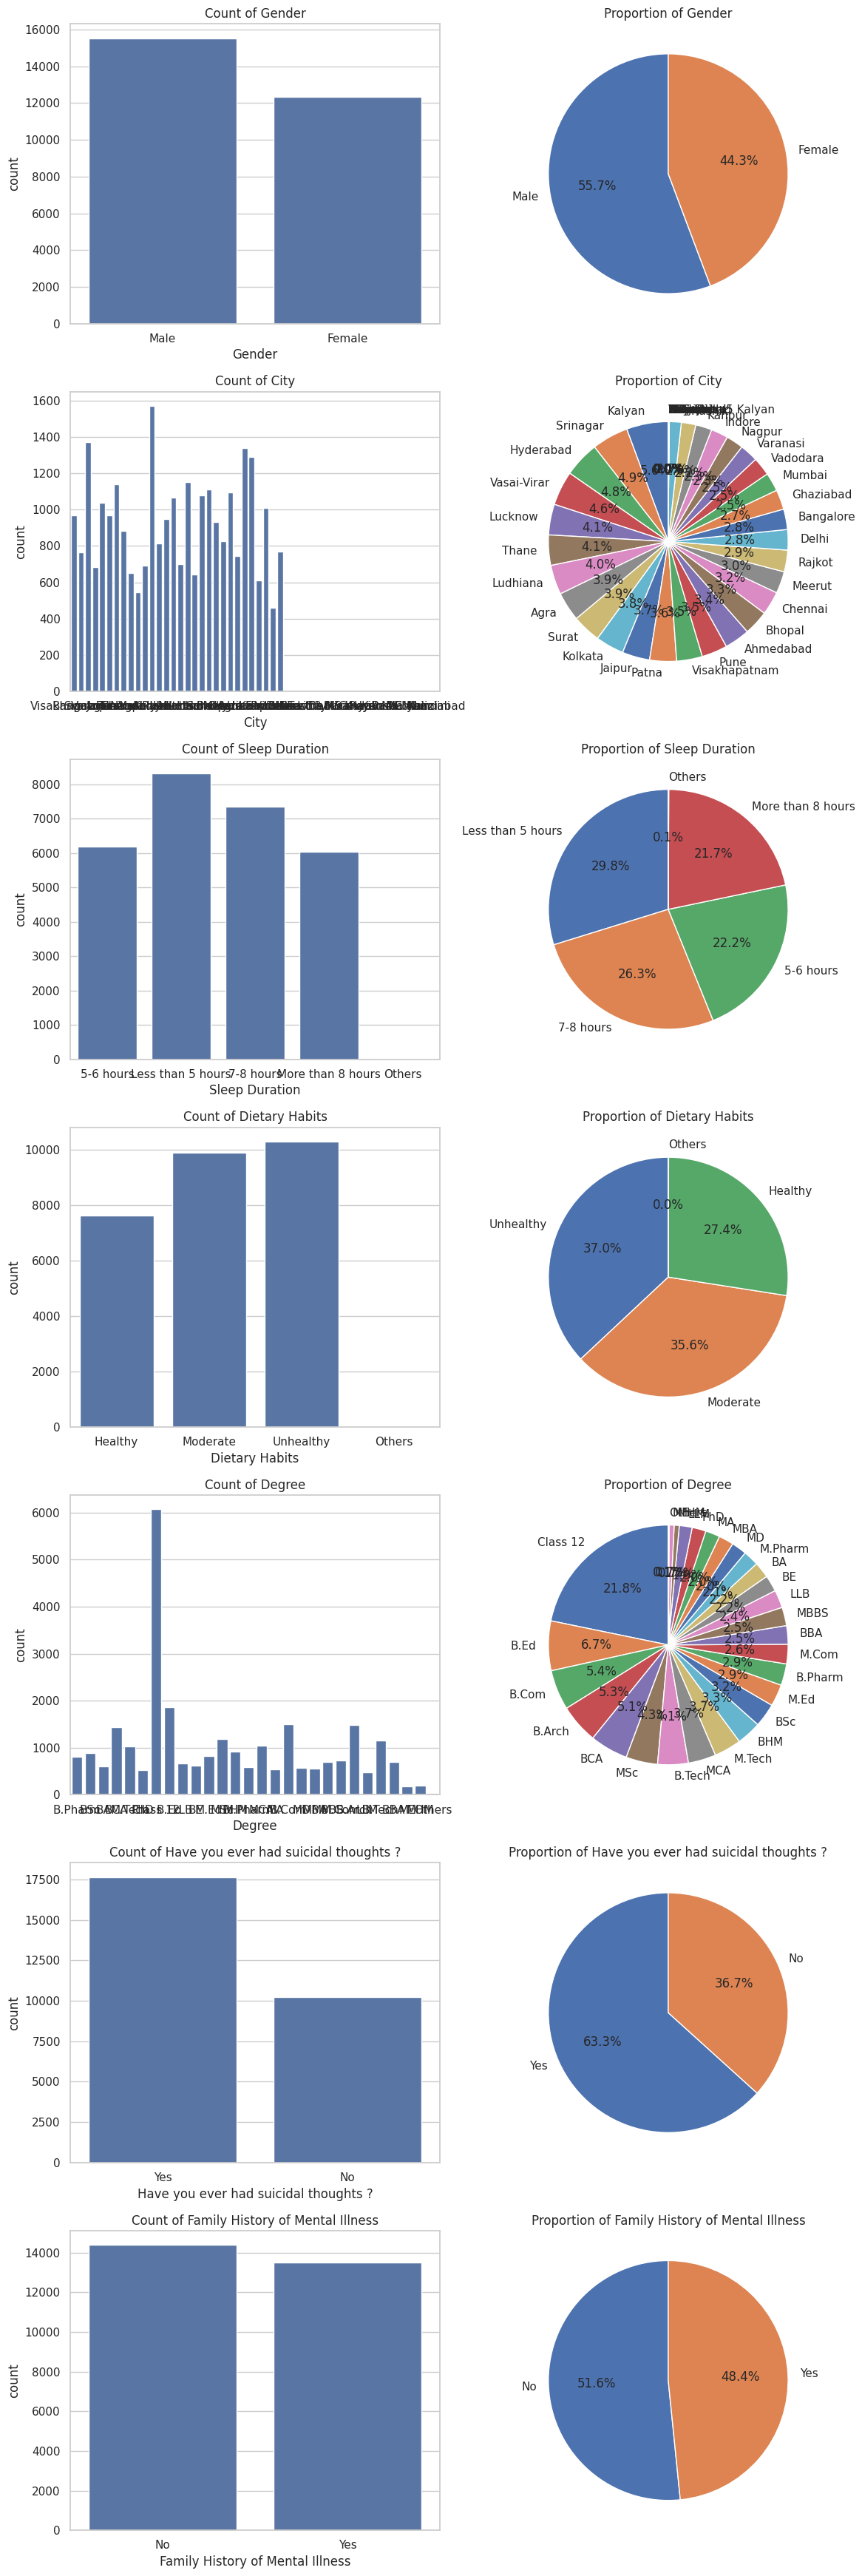

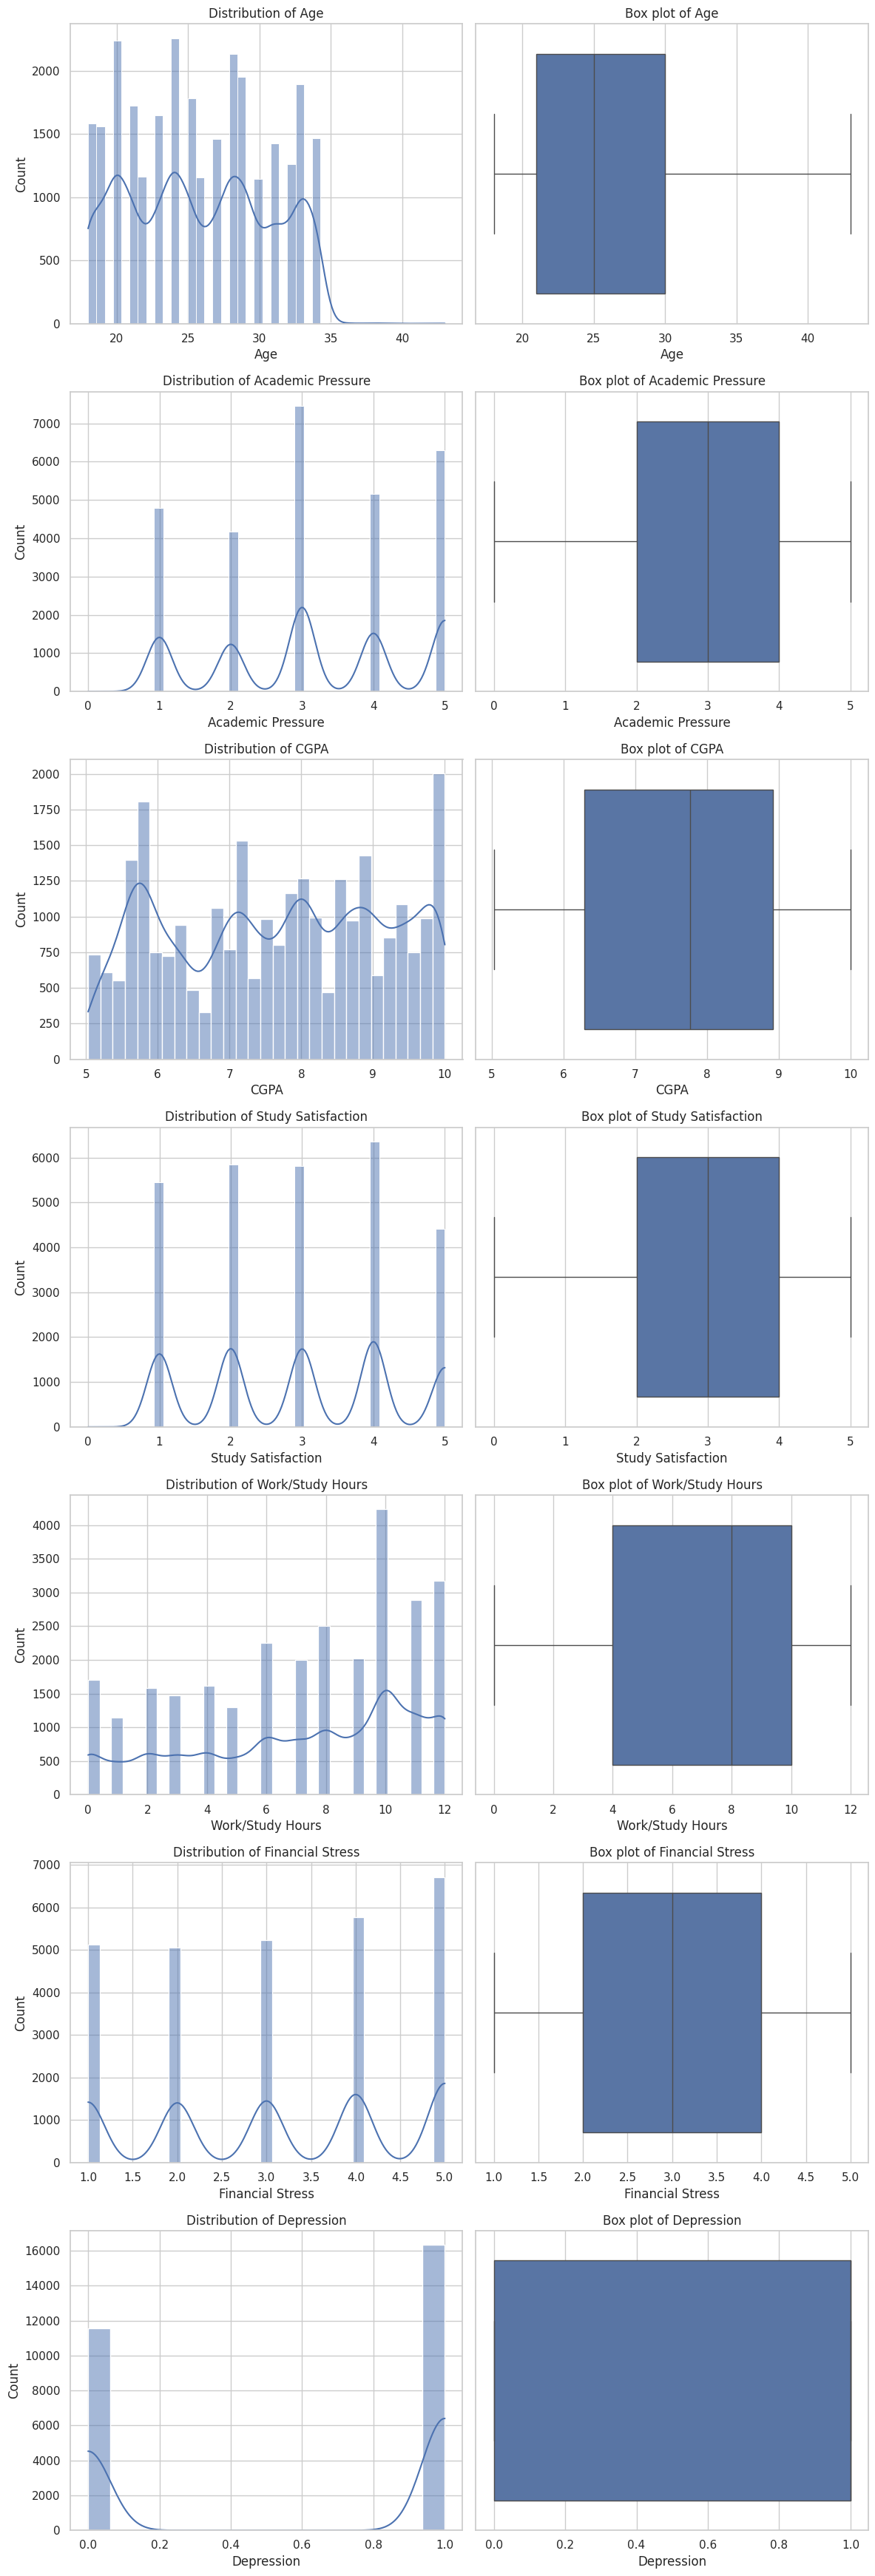

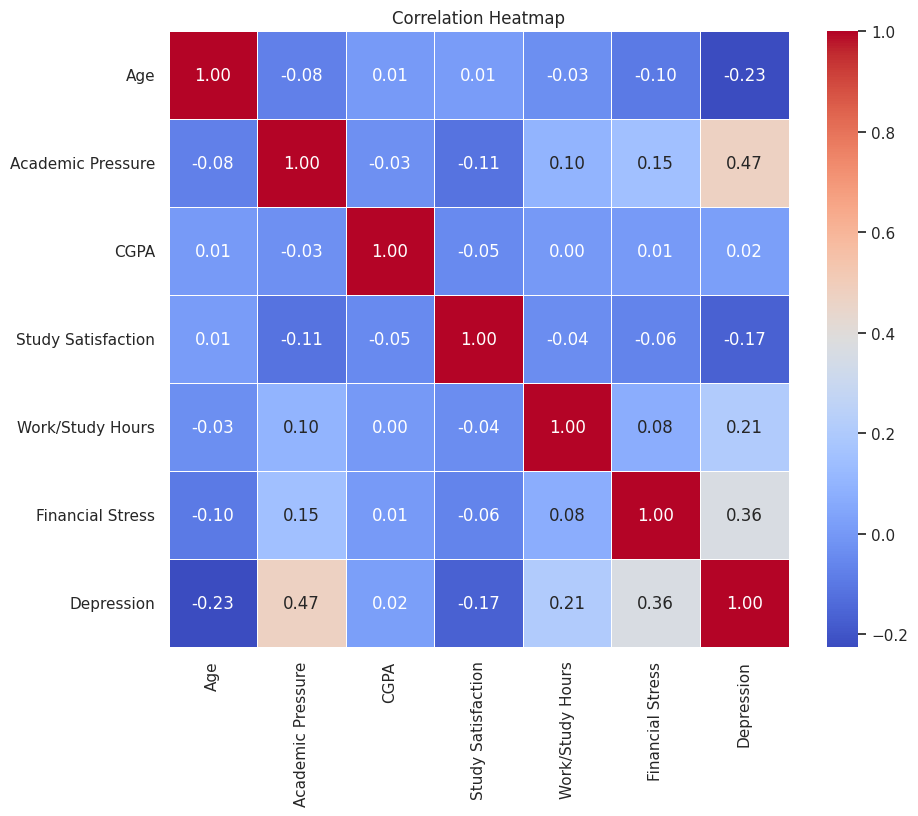

In [16]:
sns.set(style="whitegrid")

categorical_columns = ['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(12, len(categorical_columns) * 5))

for i, column in enumerate(categorical_columns):
    # Bar plot for frequency count
    sns.countplot(x=column, data=data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Count of {column}')

    # Pie chart for proportions
    pie_data = data[column].value_counts()
    axes[i, 1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Proportion of {column}')

plt.tight_layout()
plt.show()

numerical_columns = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']


fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 5))

for i, column in enumerate(numerical_columns):
    # Histogram for distribution
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')

    # Box plot for detecting outliers
    sns.boxplot(x=data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

# 3. Correlation heatmap for numerical columns
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **One-hot Encoding**

In [112]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(data[cat_columns])
encoded_data = np.hstack(
    (StandardScaler().fit_transform(data[num_columns]), encoded_categorical)
)

# **PCA and t-SNE Visulization**

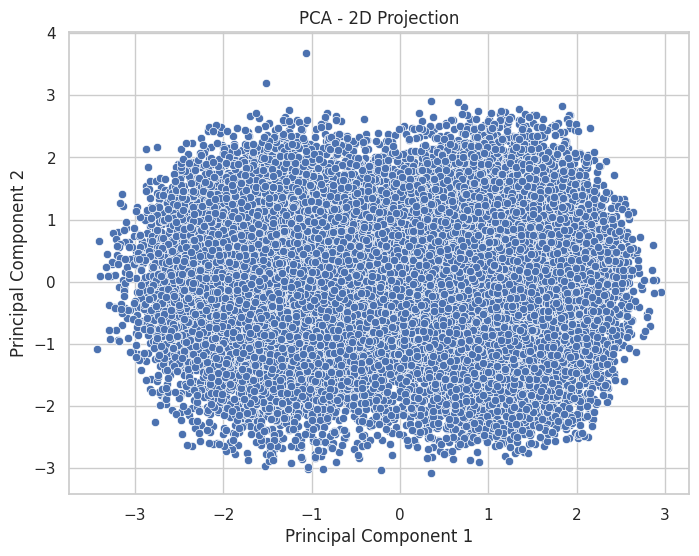

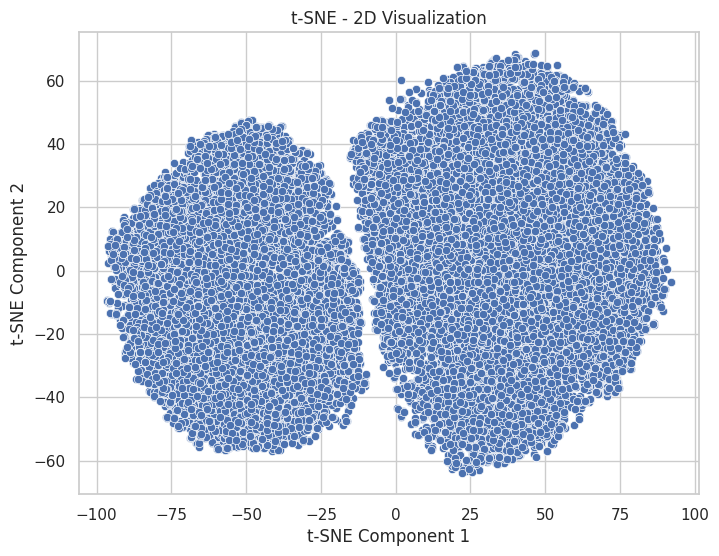

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_data)
#PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#  t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(encoded_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])
plt.title('t-SNE - 2D Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# **GMM implementation**

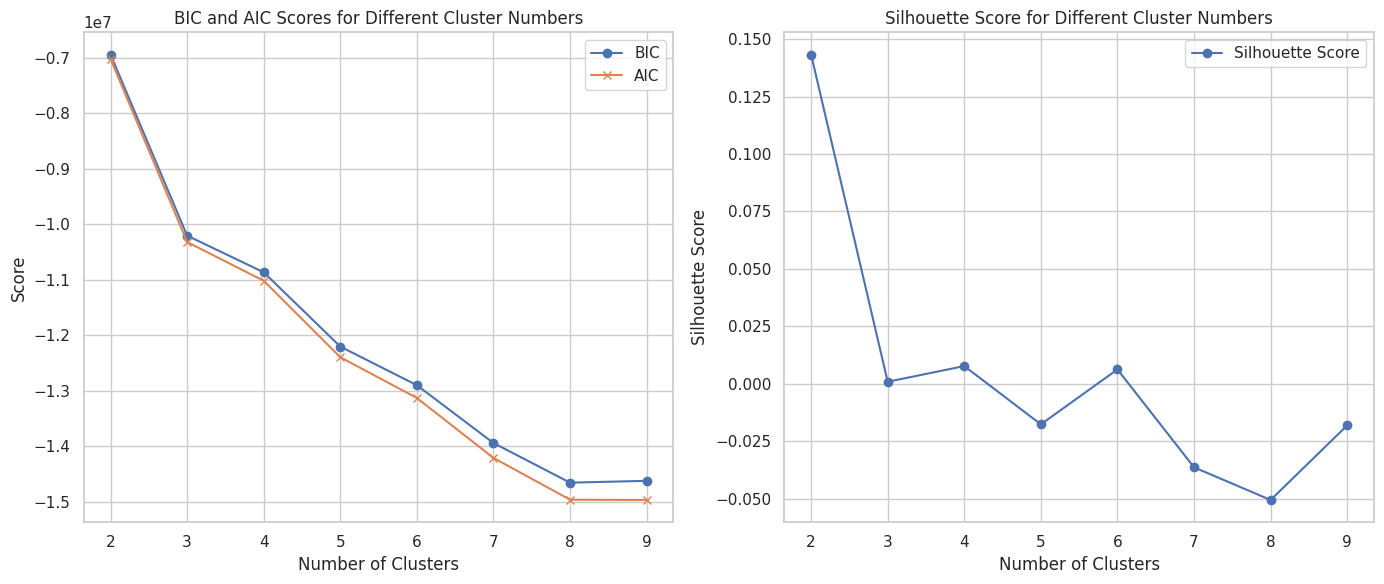

In [113]:
silhouette_scores = []
cluster_range = range(2, 10)
bic_scores = []
aic_scores = []

for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(encoded_data)

    # BIC and AIC
    bic_scores.append(gmm.bic(encoded_data))
    aic_scores.append(gmm.aic(encoded_data))

    silhouette_scores.append(silhouette_score(encoded_data, labels))

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, bic_scores, marker='o', label='BIC')
plt.plot(cluster_range, aic_scores, marker='x', label='AIC')
plt.title('BIC and AIC Scores for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()

# Plot Silhouette Scores with visualization
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

# **Applying GMM and evaluting it on origina data (Without Transformation)**

Silhouette Score (GMM): 0.1433159636018496
Davies-Bouldin Index (GMM): 2.3804341857825047


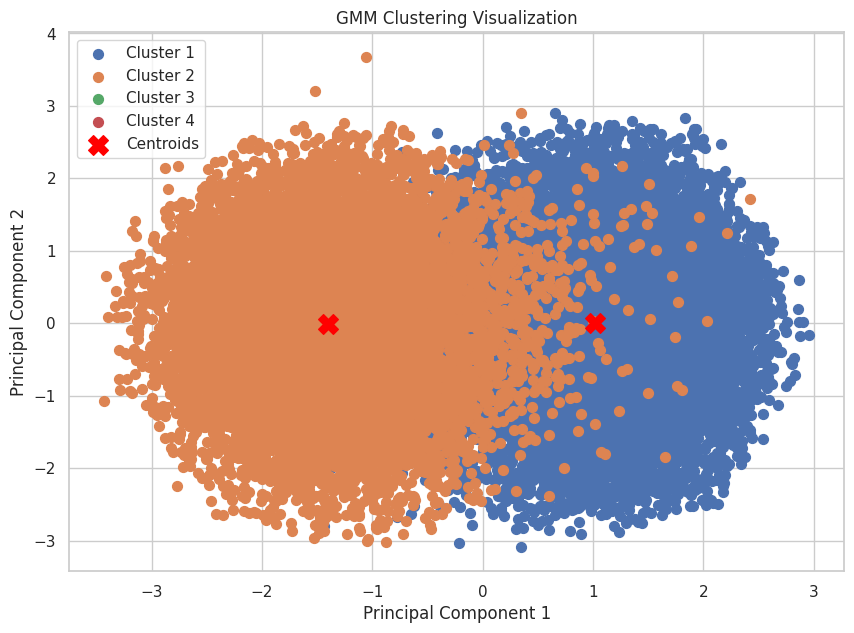

In [20]:
gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(encoded_data)

silhouette_gmm = silhouette_score(encoded_data, labels_gmm)
davies_bouldin_gmm = davies_bouldin_score(encoded_data, labels_gmm)

print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (GMM): {davies_bouldin_gmm}")

pca = PCA(n_components=2)
reduced_data_gmm = pca.fit_transform(encoded_data)

plt.figure(figsize=(10, 7))

for cluster in range(4):
    plt.scatter(
        reduced_data_gmm[labels_gmm == cluster, 0],
        reduced_data_gmm[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )

centroids_gmm = gmm.means_
reduced_centroids_gmm = pca.transform(centroids_gmm)
plt.scatter(
    reduced_centroids_gmm[:, 0],
    reduced_centroids_gmm[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)
plt.title("GMM Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## **After GMM, PCA & TSNE Visulaization**

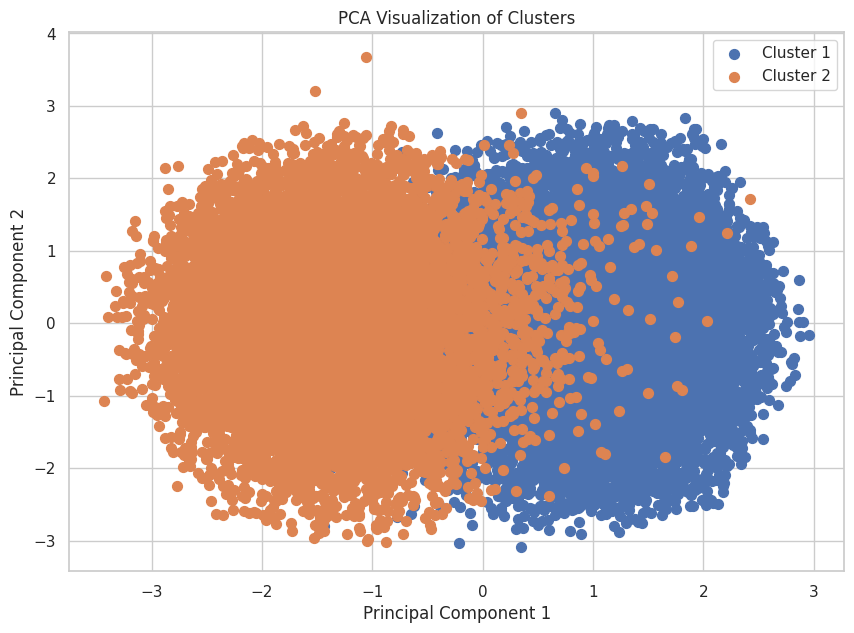

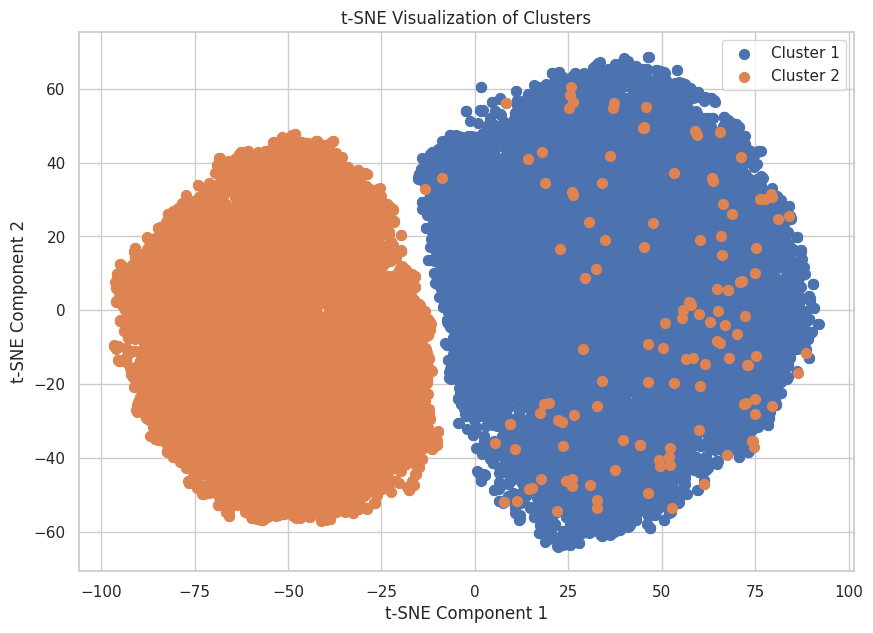

In [21]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(encoded_data)

#  t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(encoded_data)

#  PCA visualization
plt.figure(figsize=(10, 7))
for cluster in np.unique(labels_gmm):
    plt.scatter(
        reduced_data_pca[labels_gmm == cluster, 0],
        reduced_data_pca[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )
plt.title("PCA Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
for cluster in np.unique(labels_gmm):
    plt.scatter(
        reduced_data_tsne[labels_gmm == cluster, 0],
        reduced_data_tsne[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

# **Transformation**

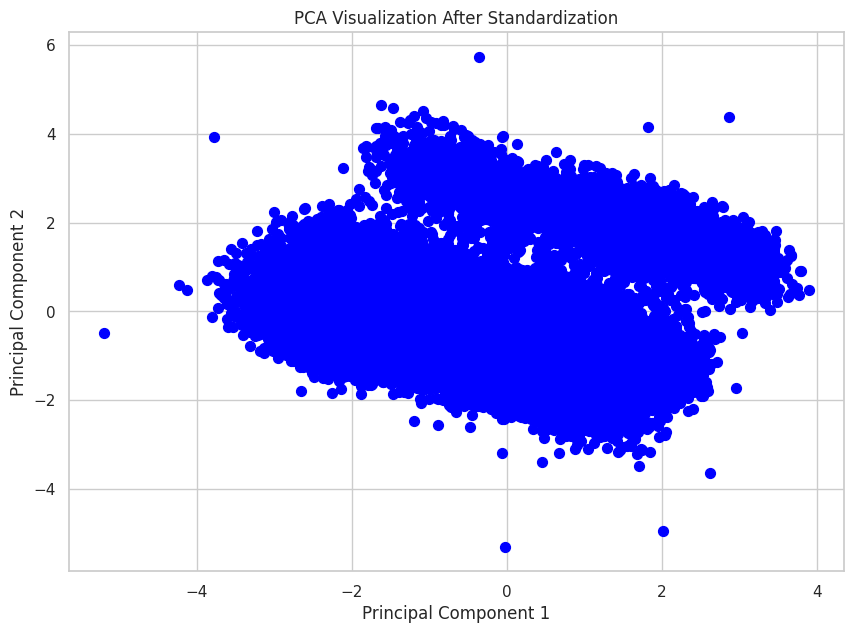

In [114]:
#Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=50)
plt.title("PCA Visualization After Standardization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# **Transformer Method:yeo-johnson Transformation on my dataset**

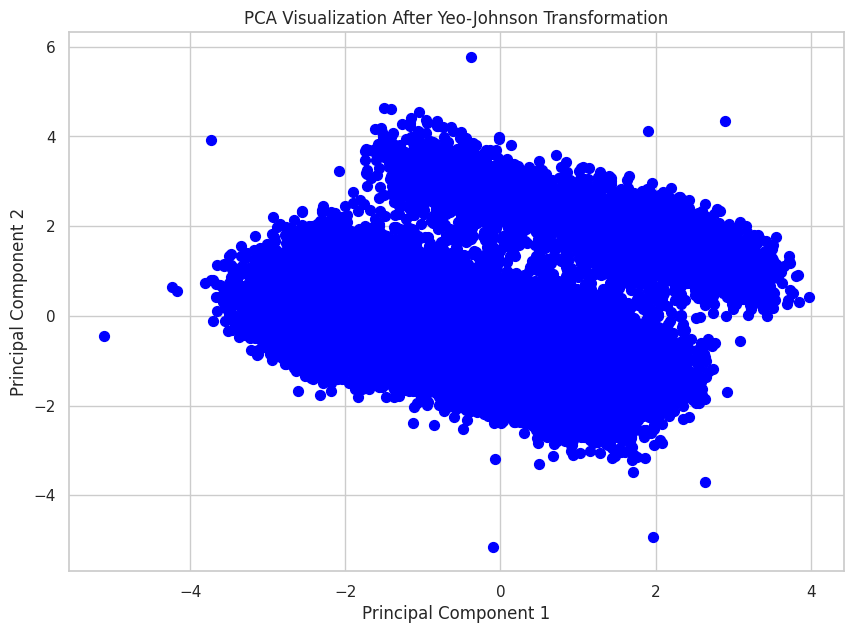

In [115]:
# Apply Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')

transformed_data = transformer.fit_transform(encoded_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualize results
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', s=50)
plt.title("PCA Visualization After Yeo-Johnson Transformation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# **GMM on transformation data**

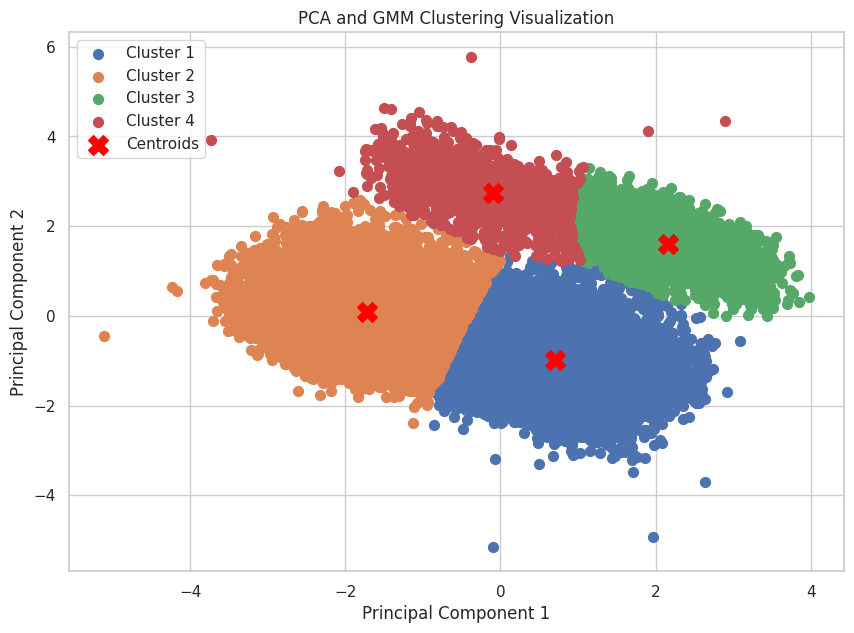

AIC: 173890.2465611628
BIC: 174079.66437802935
Silhouette Score: 0.5140710531041052


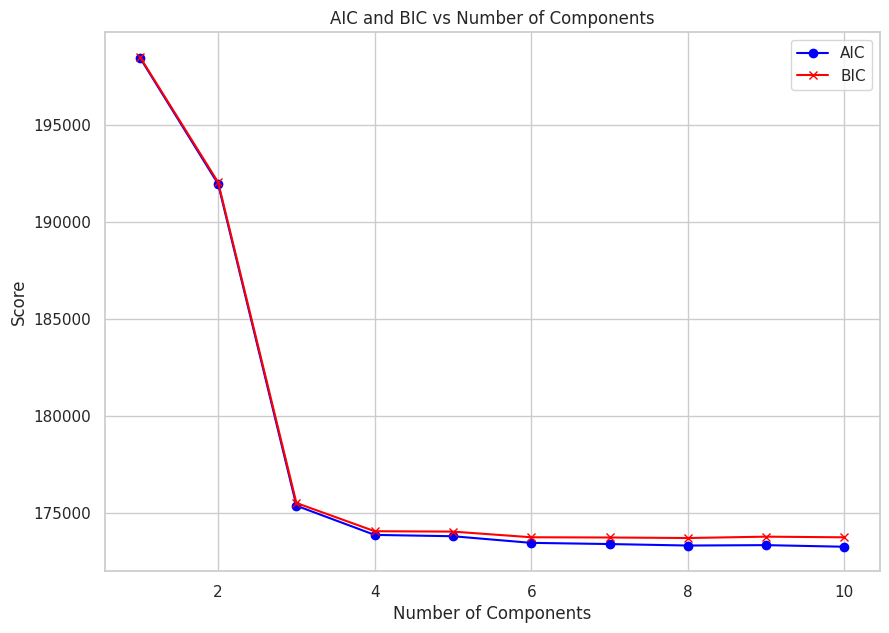

In [116]:
#  Apply Yeo-Johnson transformation data
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = transformer.fit_transform(encoded_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Fit a GMM model
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(reduced_data)

plt.figure(figsize=(10, 7))

for cluster in range(4):  # Assuming 4 clusters from GMM
    plt.scatter(
        reduced_data[labels_gmm == cluster, 0],
        reduced_data[labels_gmm == cluster, 1],
        label=f"Cluster {cluster + 1}",
        s=50
    )
centroids_gmm = gmm.means_
plt.scatter(
    centroids_gmm[:, 0],
    centroids_gmm[:, 1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)
plt.title("PCA and GMM Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

aic = gmm.aic(reduced_data)
bic = gmm.bic(reduced_data)

silhouette = silhouette_score(reduced_data, labels_gmm)

print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"Silhouette Score: {silhouette}")

n_components_range = range(1, 11)
aic_scores = []
bic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(reduced_data)
    aic_scores.append(gmm.aic(reduced_data))
    bic_scores.append(gmm.bic(reduced_data))

# Plotting the AIC and BIC scores
plt.figure(figsize=(10, 7))
plt.plot(n_components_range, aic_scores, label="AIC", color='blue', marker='o')
plt.plot(n_components_range, bic_scores, label="BIC", color='red', marker='x')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("AIC and BIC vs Number of Components")
plt.legend()
plt.show()


In [117]:
data

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [118]:
features = data.columns
features

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [123]:
#reduce dimesion for mathcing
print("Length of reduced_data:", len(reduced_data))
print("Length of mydata:", len(mydata))

if len(reduced_data) != len(mydata):
    mydata = mydata.iloc[:len(reduced_data)].copy()

mydata['Cluster'] = labels_gmm


Length of reduced_data: 27877
Length of mydata: 27901


# **Radar plot for individual clustering**

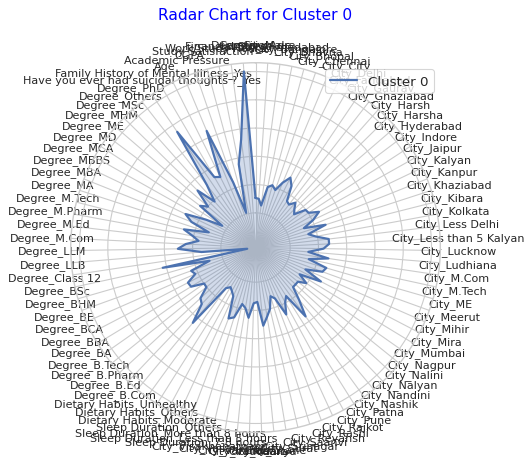

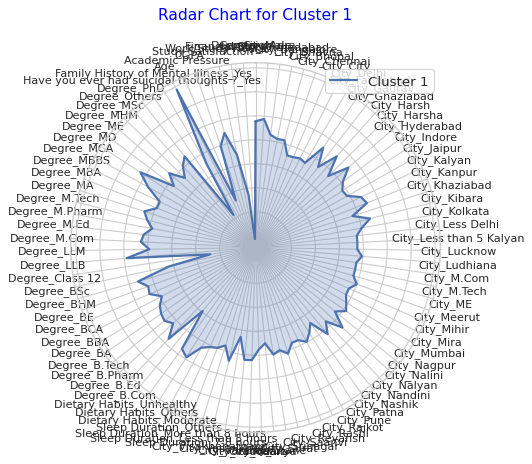

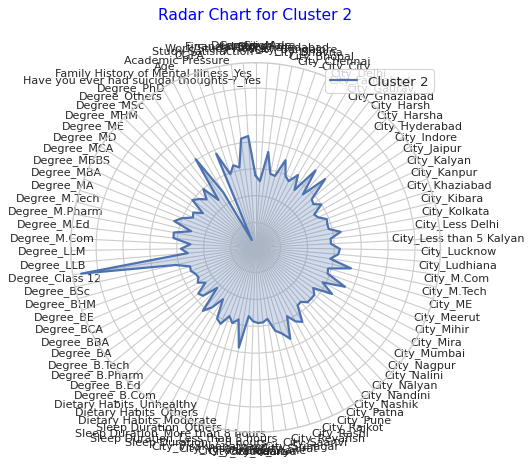

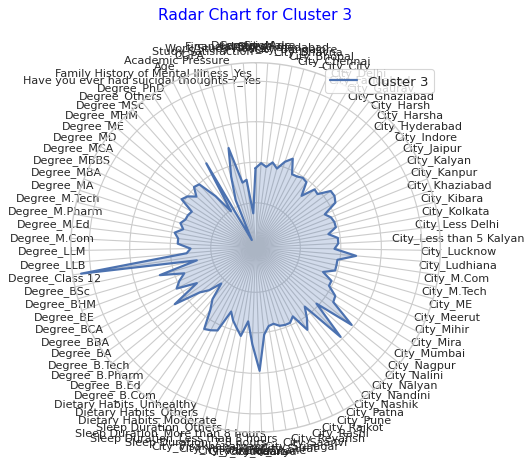

In [141]:
categorical_columns = mydata.select_dtypes(include=['object']).columns.tolist()
numerical_columns = mydata.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)  # Use sparse=False for dense output
    ],
    remainder='passthrough'
)

encoded_data = preprocessor.fit_transform(mydata)

encoded_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)

all_columns = list(encoded_columns) + numerical_columns
encoded_data_df = pd.DataFrame(encoded_data, columns=all_columns)

encoded_data_df['Cluster'] = mydata['Cluster']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data_df.drop('Cluster', axis=1))

encoded_data_scaled_df = pd.DataFrame(scaled_data, columns=encoded_data_df.drop('Cluster', axis=1).columns)
encoded_data_scaled_df['Cluster'] = encoded_data_df['Cluster']

# Compute the average of each feature for each cluster
cluster_means = encoded_data_scaled_df.groupby('Cluster').mean()

#  Plot Radar Chart for each cluster
labels = cluster_means.columns  # Feature names
num_clusters = len(cluster_means)

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

angles += angles[:1]

# Plot for each cluster
for cluster in range(num_clusters):
    values = cluster_means.iloc[cluster].tolist()
    values += values[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), dpi=80, subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)

    ax.set_title(f"Radar Chart for Cluster {cluster}", size=14, color='blue', y=1.1)

    plt.legend(loc='upper right', fontsize=12)
    plt.show()


In [ ]:
# n_clusters=np.arange(2, 8)
# bics=[]
# bics_err=[]
# iterations=20
# for n in n_clusters:
#     tmp_bic=[]
#     for _ in range(iterations):
#         gmm=GaussianMixture(n, n_init=2).fit(X_principal)

#         tmp_bic.append(gmm.bic(X_principal))
#     val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
#     err=np.std(tmp_bic)
#     bics.append(val)
#     bics_err.append(err)

# ***Analysis of results before transformation & after Transformation***

## **Before Transormation**
Silhouette Score : 0.1433159636018496

Davies-Bouldin Index : 2.3804341857825047

## **After Transformation**

AIC: 173890.2465611628

BIC: 174079.66437802935

Silhouette Score: 0.5140710531041052


# ***The transformation led to a substantial improvement in cluster separation, as indicated by the significant increase in Silhouette Score from 0.143 to 0.514. Additionally, the Davies-Bouldin Index decreased from 2.380 to 2.380***